In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from sklearn.linear_model import LinearRegression 



In [2]:
data = pd.read_csv("abalone.csv")
data.describe(include='all')
list(data)

['sex',
 'length',
 'diameter',
 'height',
 'whole weight',
 'shucked weight',
 'viscera weight',
 'shell weight',
 'rings']

In [3]:
table = data.loc[:, ['sex',
 'length',
 'diameter',
 'height',
 'whole weight',
 'shucked weight',
 'viscera weight',
 'shell weight',
 'rings']]
table

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19


In [4]:
df_male = table['sex'] == 'M'
tableM = table[df_male]
tableM

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
11,M,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.1350,10
12,M,0.490,0.380,0.135,0.5415,0.2175,0.0950,0.1900,11
15,M,0.500,0.400,0.130,0.6645,0.2580,0.1330,0.2400,12
18,M,0.365,0.295,0.080,0.2555,0.0970,0.0430,0.1000,7
19,M,0.450,0.320,0.100,0.3810,0.1705,0.0750,0.1150,9
20,M,0.355,0.280,0.095,0.2455,0.0955,0.0620,0.0750,11


In [5]:
df_female = table['sex'] == 'F'
tableF = table[df_female]
tableF

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19
10,F,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.2100,14
13,F,0.535,0.405,0.145,0.6845,0.2725,0.1710,0.2050,10
14,F,0.470,0.355,0.100,0.4755,0.1675,0.0805,0.1850,10
17,F,0.440,0.340,0.100,0.4510,0.1880,0.0870,0.1300,10
22,F,0.565,0.440,0.155,0.9395,0.4275,0.2140,0.2700,12
23,F,0.550,0.415,0.135,0.7635,0.3180,0.2100,0.2000,9


In [6]:
df_infant = table['sex'] == 'I'
tableI = table[df_infant]
tableI

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
16,I,0.355,0.280,0.085,0.2905,0.0950,0.0395,0.1150,7
21,I,0.380,0.275,0.100,0.2255,0.0800,0.0490,0.0850,10
42,I,0.240,0.175,0.045,0.0700,0.0315,0.0235,0.0200,5
43,I,0.205,0.150,0.055,0.0420,0.0255,0.0150,0.0120,5
44,I,0.210,0.150,0.050,0.0420,0.0175,0.0125,0.0150,4
45,I,0.390,0.295,0.095,0.2030,0.0875,0.0450,0.0750,7
48,I,0.325,0.245,0.070,0.1610,0.0755,0.0255,0.0450,6
50,I,0.520,0.410,0.120,0.5950,0.2385,0.1110,0.1900,8


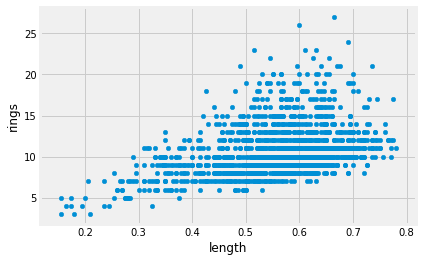

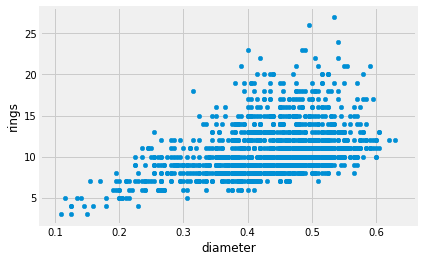

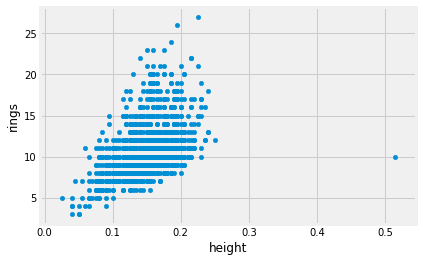

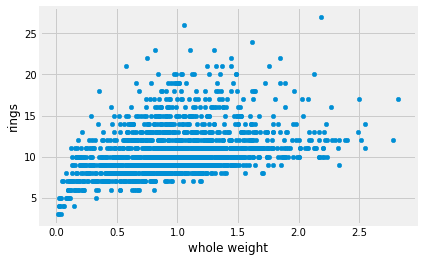

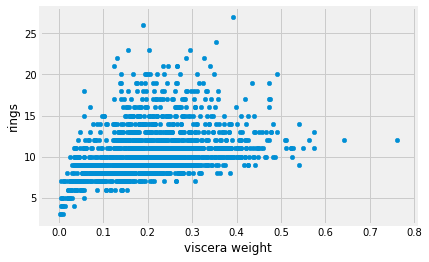

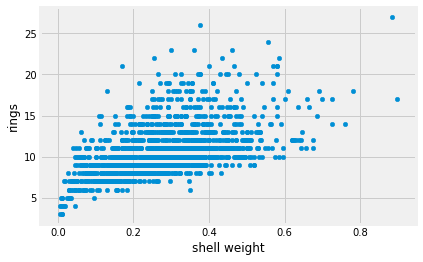

In [7]:
tableM.plot.scatter('length', 'rings', s=None, c=None)
tableM.plot.scatter('diameter', 'rings', s=None, c=None)
tableM.plot.scatter('height', 'rings', s=None, c=None)
tableM.plot.scatter('whole weight', 'rings', s=None, c=None)
tableM.plot.scatter('viscera weight', 'rings', s=None, c=None)
tableM.plot.scatter('shell weight', 'rings', s=None, c=None)

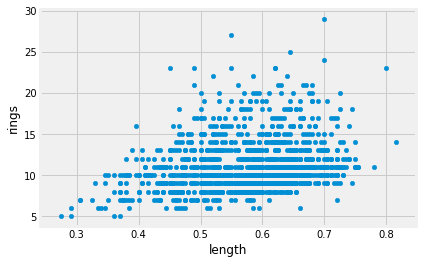

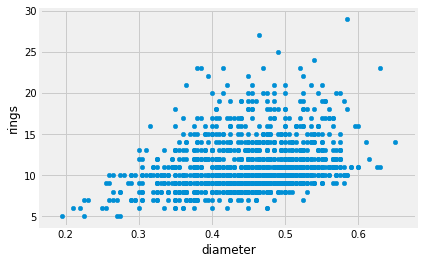

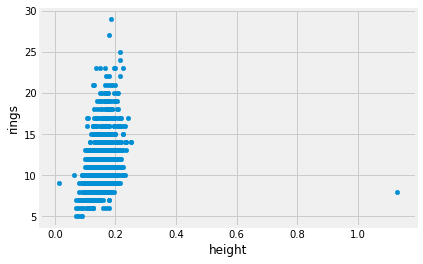

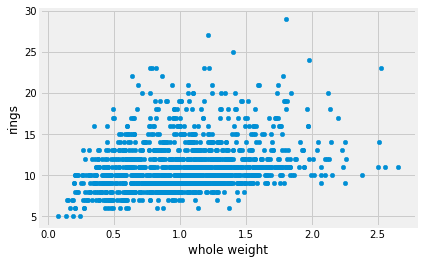

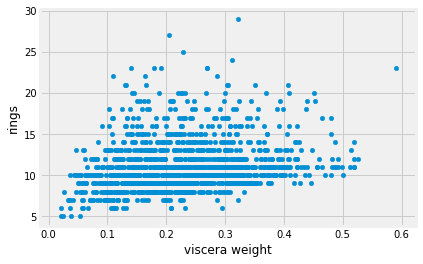

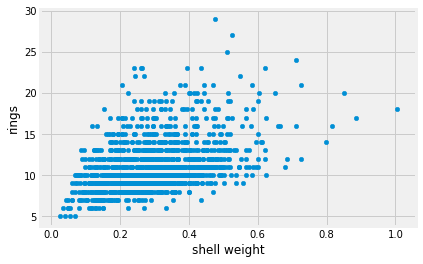

In [8]:
tableF.plot.scatter('length', 'rings', s=None, c=None)
tableF.plot.scatter('diameter', 'rings', s=None, c=None)
tableF.plot.scatter('height', 'rings', s=None, c=None)
tableF.plot.scatter('whole weight', 'rings', s=None, c=None)
tableF.plot.scatter('viscera weight', 'rings', s=None, c=None)
tableF.plot.scatter('shell weight', 'rings', s=None, c=None)

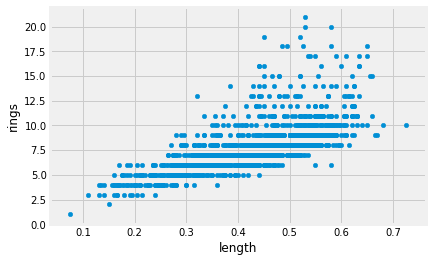

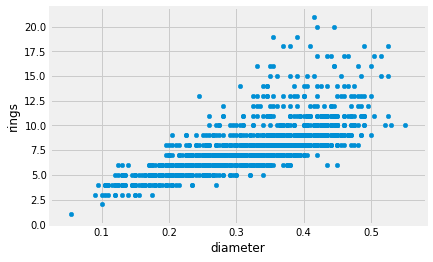

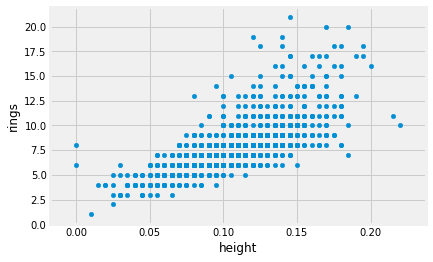

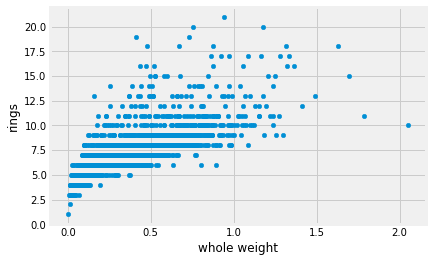

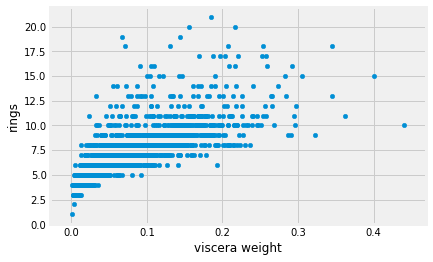

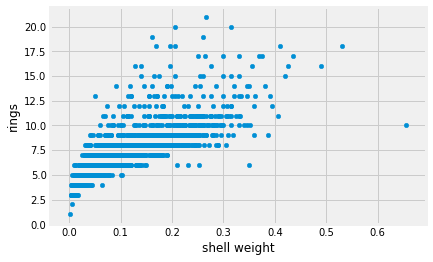

In [9]:
tableI.plot.scatter('length', 'rings', s=None, c=None)
tableI.plot.scatter('diameter', 'rings', s=None, c=None)
tableI.plot.scatter('height', 'rings', s=None, c=None)
tableI.plot.scatter('whole weight', 'rings', s=None, c=None)
tableI.plot.scatter('viscera weight', 'rings', s=None, c=None)
tableI.plot.scatter('shell weight', 'rings', s=None, c=None)

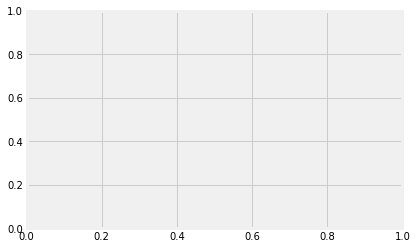

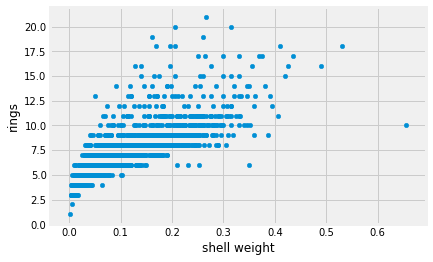

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
tableI.plot.scatter('shell weight', 'rings', s=None, c=None)

In [11]:
tableM.replace(to_replace = [np.inf, -np.inf], value = np.nan)
tableM = tableM.dropna(axis = 0, how ='any')
tableM
#np.all(np.isfinite(newpoor1))
#np.any(np.isnan(newpoor1))

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
11,M,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.1350,10
12,M,0.490,0.380,0.135,0.5415,0.2175,0.0950,0.1900,11
15,M,0.500,0.400,0.130,0.6645,0.2580,0.1330,0.2400,12
18,M,0.365,0.295,0.080,0.2555,0.0970,0.0430,0.1000,7
19,M,0.450,0.320,0.100,0.3810,0.1705,0.0750,0.1150,9
20,M,0.355,0.280,0.095,0.2455,0.0955,0.0620,0.0750,11


In [12]:
x = tableM['shell weight'].values[:np.newaxis]
y = tableM['rings']

# Reshaping
x, y = x.reshape(-1,1), y.reshape(-1, 1)

# Linear Regression Object 
lin_regression = LinearRegression()

# Fitting linear model to the data
lin_regression.fit(x,y)

# Get slope of fitted line
m = lin_regression.coef_

# Get y-Intercept of the Line
b = lin_regression.intercept_

# Get Predictions for original x values
# you can also get predictions for new data
predictions = lin_regression.predict(x)

print (b)
print (m)

[7.37262799]
[[11.81997505]]


/Users/javier/Envs/data-x/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [13]:
print("""I ran a few multiple different scatterplots. I was really curious to see how the rings of an abolone correlated it other characteristics, so I did the multiple scatterplots setting the dependent variable y to be 'rings.' From there, I tested each of the other colums as an x variable to see the correlation between rings and other traits. 
I found that the variables that correlated the highest with rings were length and diameter. This made sense because the bigger the shell, the more space there would be for rings. I was more interested to see correlation between rings and other traits though, so I decided to run linear regression with rings as my dependent y variable and shell weight as my independent x variable
After running linear regression, I found that regression equation to be rings = 11.82*(shell weight) + 7.37
""")



I ran a few multiple different scatterplots. I was really curious to see how the rings of an abolone correlated it other characteristics, so I did the multiple scatterplots setting the dependent variable y to be 'rings.' From there, I tested each of the other colums as an x variable to see the correlation between rings and other traits. 
I found that the variables that correlated the highest with rings were length and diameter. This made sense because the bigger the shell, the more space there would be for rings. I was more interested to see correlation between rings and other traits though, so I decided to run linear regression with rings as my dependent y variable and shell weight as my independent x variable
After running linear regression, I found that regression equation to be rings = 11.82*(shell weight) + 7.37



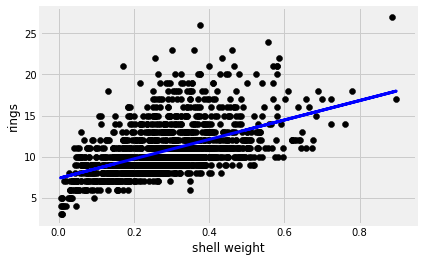

In [14]:
plt.scatter(x, y,  color='black')
a =plt.plot(x, predictions, color='blue',linewidth=3)
plt.xlabel('shell weight')
plt.ylabel('rings')
plt.show()


In [15]:
#draw a scatterplot
def scatter(table, xcol, ycol, marker_color='blue'):
    
    #Cleaning missing and invalid data in table
    table.replace(to_replace = [np.inf, -np.inf], value = np.nan)
    table = table.dropna(axis = 0, how ='any')
 
    #Assigning axes
    x = table[xcol].values[:np.newaxis]
    y = table[ycol] 

    # Reshaping
    x, y = x.reshape(-1,1), y.reshape(-1, 1)
    
    plt.scatter(x, y,  color = marker_color)


#Regress on a scatterplot with xcol and ycol (column names - str) from table
def scatter_and_regress(table, xcol, ycol, marker_color='blue'):
    
    #Cleaning missing and invalid data in table
    table.replace(to_replace = [np.inf, -np.inf], value = np.nan)
    table = table.dropna(axis = 0, how ='any')
 
    #Assigning axes
    x = table[xcol].values[:np.newaxis]
    y = table[ycol] 

    # Reshaping
    x, y = x.reshape(-1,1), y.reshape(-1, 1)

    # Linear Regression Object 
    lin_regression = LinearRegression()

    # Fitting linear model to the data
    lin_regression.fit(x,y)

    # Get slope of fitted line
    m = lin_regression.coef_

    # Get y-Intercept of the Line
    b = lin_regression.intercept_

    # Get Predictions for original x values
    predictions = lin_regression.predict(x)

    plt.scatter(x, y,  color = marker_color)
    plt.plot(x, predictions, color='black',linewidth=3)
    plt.xlabel(xcol)
    plt.ylabel(ycol)
    plt.show()


In [16]:
KNN = table.loc[:, ['sex', 'rings', 'whole weight', 'shell weight', 'viscera weight']]
KNN.head(3)

#reshuffle rows and divide into 2 sets - training and testing sets

,sex,rings,whole weight,shell weight,viscera weight
0,M,15,0.5140,0.15,0.1010
1,M,7,0.2255,0.07,0.0485
2,F,9,0.6770,0.21,0.1415


In [17]:
def cutoff_and_above(df, column, cutoff_value):
    """For each row, return True if the value in the column is equal to and above the cutoff_value"""
    classified = (df[column]>=cutoff_value)
    
    #Showing number of True (equal and above) and False values
    print(classified.value_counts())
    return classified

    
def color_code(bool_array):
    """Return a color-coded array: 'Blue' for True values; 'Red' for False"""
    color = bool_array.apply(lambda row: 'Blue' if row == 'M' else 'Red' if row == 'F'  else 'Green')
    return color


def scatter_and_colorcode(table, xcol, ycol, color_col):
    """Draw a scatterplot w.r.t. Color column in table"""
    color = table[color_col]
    scatter(table, xcol, ycol, color)

def distance_two_features(df, x_feature, y_feature):
    x1-x2, y1-y2
    """Compute the distance between x_feature and y_feature"""
    x = df[x_feature] 
    y = df[y_feature]
    return np.sqrt(- rotem(x_feature))**2 + (row0.item(y_feature)-row1.item(y_feature))**2

In [18]:

KNN['Color'] = color_code(table['sex'])
KNN.head(3)

,sex,rings,whole weight,shell weight,viscera weight,Color
0,M,15,0.5140,0.15,0.1010,Blue
1,M,7,0.2255,0.07,0.0485,Blue
2,F,9,0.6770,0.21,0.1415,Red


(0, 30)

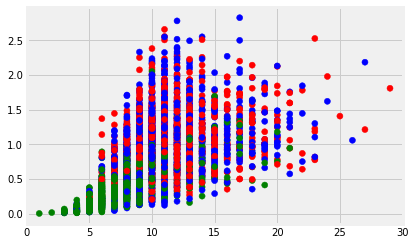

In [19]:
scatter_and_colorcode(KNN, 'rings','whole weight', 'Color')
plt.xlim(0,30)

(0, 30)

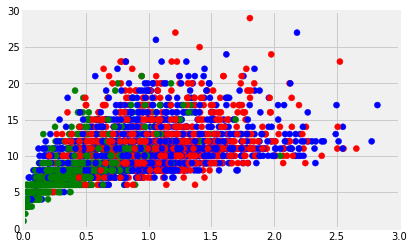

In [20]:
scatter_and_colorcode(KNN, 'whole weight','rings', 'Color')
plt.xlim(0,3)
plt.ylim(0,30)

(0, 30)

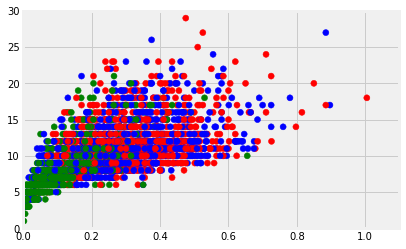

In [21]:
scatter_and_colorcode(KNN, 'shell weight','rings', 'Color')
plt.xlim(0,1.1)
plt.ylim(0,30)

(0, 1.1)

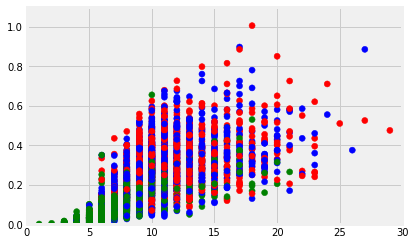

In [22]:
scatter_and_colorcode(KNN, 'rings', 'shell weight', 'Color')
plt.xlim(0,30)
plt.ylim(0,1.1)

(0, 0.8)

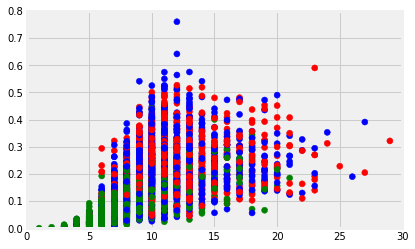

In [23]:
scatter_and_colorcode(KNN, 'rings', 'viscera weight', 'Color')
plt.xlim(0,30)
plt.ylim(0,0.8)

(0, 30)

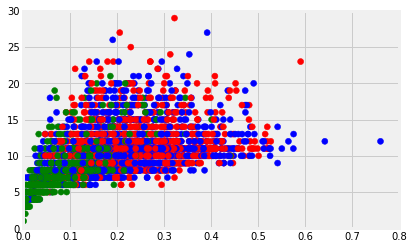

In [24]:
scatter_and_colorcode(KNN, 'viscera weight', 'rings', 'Color')
plt.xlim(0,0.8)
plt.ylim(0,30)

In [25]:
print('The second model that I use is K nearest neighbors. I wanted to see how viscera weight specifically corresponded to rings. I printed a list of both the actual and predicted rings. For the first row, the abolone had 9 rings, where my algorithm predicted 9.8 rings')

The second model that I use is K nearest neighbors. I wanted to see how viscera weight specifically corresponded to rings. I printed a list of both the actual and predicted rings. For the first row, the abolone had 9 rings, where my algorithm predicted 9.8 rings


In [26]:
KNN = tableF.loc[:, ['rings', 'viscera weight']]
#Cleaning missing and invalid data in table
KNN.replace(to_replace = [np.inf, -np.inf], value = np.nan)
KNN = table.dropna(axis = 0, how ='any')

#Sourcecode: https://www.dataquest.io/blog/k-nearest-neighbors-in-python/
import random
import math
from numpy.random import permutation

# Randomly shuffle the index of KNN.
random_indices = permutation(KNN.index)
# Divide the data into half for training and testing set
test_cutoff = math.floor(len(KNN)/2)
# Generate the test set by taking the first 1/2 of the randomly shuffled indices.
test = KNN.loc[random_indices[1:test_cutoff]]
# Generate the train set with the rest of the data.
train = KNN.loc[random_indices[test_cutoff:]]
# The columns that we will be making predictions with.
x_columns = ['viscera weight']
# The column that we want to predict.
y_column = ['rings']

from sklearn.neighbors import KNeighborsRegressor
# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsRegressor(n_neighbors=5)
# Fit the model on the training data.
knn.fit(train[x_columns], train[y_column])
# Make point predictions on the test set using the fit model.
predictions = knn.predict(test[x_columns])
    
# Get the actual values for the test set.
actual = test[y_column]
Actual_vs_Predictions = {'Actual': actual, 'Predicted': predictions}
print(Actual_vs_Predictions)

# Compute the mean squared error of our predictions.
mse = (((predictions - actual) ** 2).sum()) / len(predictions)
print(mse)

{'Actual':       rings
2535     11
821       6
1008     10
1729     11
3833     11
4167      9
3739      9
1755      7
1915     11
3304     16
304      10
926       7
2025     10
155      10
2521      9
361      12
67       13
3591      9
1816     10
4056     11
2140     10
3256     12
2246     10
170      14
2812      5
839       9
2317     13
806       6
4084     10
1695      8
...     ...
405      12
2556      6
15       12
478      21
475      17
2600     10
856       9
2799     10
292      15
2240     12
2561      6
1900      9
2286      9
1601      9
3136     11
2247      9
2936     11
2379     10
3618     11
693       9
3313     11
573      17
3892     13
2400     13
1907      9
3813      8
3891     12
1598      9
2644      8
3763     11

[2087 rows x 1 columns], 'Predicted': array([[10.6],
       [ 7.8],
       [ 9.4],
       ...,
       [ 7.6],
       [10. ],
       [10.8]])}
rings    8.399655
dtype: float64
